In [1]:
import pandas as pd
import numpy as np

In [2]:
path_players = "../data/aggregates/aus1league_physicalaggregates_20242025_midfielders.csv"

In [3]:
df = pd.read_csv(path_players)

In [4]:
df.head()

,player_name,player_short_name,player_id,player_birthdate,team_name,team_id,competition_name,competition_id,season_name,season_id,...,sprint_distance_full_otip,sprint_count_full_otip,hi_distance_full_otip,hi_count_full_otip,medaccel_count_full_otip,highaccel_count_full_otip,meddecel_count_full_otip,highdecel_count_full_otip,explacceltohsr_count_full_otip,explacceltosprint_count_full_otip
0,Adam Taggart,A. Taggart,211,1993-06-02,Perth Glory Football Club,871,AUS - A-League,61,2024/2025,95,...,48.46,3.00,297.83,27.21,42.38,2.67,38.25,6.96,1.92,0.08
1,Adama Traoré,A. Traoré,218,1990-02-03,Melbourne Victory Football Club,868,AUS - A-League,61,2024/2025,95,...,69.67,4.00,315.33,25.00,37.83,2.00,25.67,4.50,1.17,0.50
2,Dino Arslanagić,D. Arslanagić,2759,1993-04-24,Macarthur FC,1804,AUS - A-League,61,2024/2025,95,...,29.12,1.25,223.25,16.88,45.12,1.75,30.75,3.50,1.25,0.00
3,Douglas Costa de Souza,Douglas Costa,2858,1990-09-14,Sydney Football Club,869,AUS - A-League,61,2024/2025,95,...,28.00,2.00,227.25,17.50,28.75,2.00,25.00,3.00,0.75,0.25
4,Douglas Costa de Souza,Douglas Costa,2858,1990-09-14,Sydney Football Club,869,AUS - A-League,61,2024/2025,95,...,1.00,0.00,170.00,16.00,26.00,0.00,21.00,2.00,0.00,0.00


In [5]:
df[df['player_short_name']=='Douglas Costa'].drop(columns = ["season_id", "season_name", "competition_id", "competition_name", "team_id", "count_match", "minutes_full_all"])

,player_name,player_short_name,player_id,player_birthdate,team_name,position_group,minutes_full_tip,minutes_full_otip,count_match_failed,total_distance_full_all,...,sprint_distance_full_otip,sprint_count_full_otip,hi_distance_full_otip,hi_count_full_otip,medaccel_count_full_otip,highaccel_count_full_otip,meddecel_count_full_otip,highdecel_count_full_otip,explacceltohsr_count_full_otip,explacceltosprint_count_full_otip
3,Douglas Costa de Souza,Douglas Costa,2858,1990-09-14,Sydney Football Club,Center Forward,27.43,24.81,0,10521.25,...,28.00,2.0,227.25,17.50,28.75,2.0,25.0,3.00,0.75,0.25
4,Douglas Costa de Souza,Douglas Costa,2858,1990-09-14,Sydney Football Club,Midfield,20.63,17.78,0,7843.00,...,1.00,0.0,170.00,16.00,26.00,0.0,21.0,2.00,0.00,0.00
5,Douglas Costa de Souza,Douglas Costa,2858,1990-09-14,Sydney Football Club,Wide Attacker,26.34,21.50,0,10349.25,...,39.25,2.5,349.75,26.25,34.50,2.0,24.5,5.25,0.75,0.00


L'explication au fait qu'il puisse y avoir plusieurs lignes pour chaque joueur de foot tient à la position du joueur, qui n'est pas toujours la même selon les matchs. 

Ici, vu le nombre "limité" de données, on va garder toutes les lignes du dataset

In [6]:
cols_with_na = df.columns[df.isna().any()].tolist()
print(cols_with_na)

['player_birthdate', 'timetohsr_top3', 'timetosprint_top3']


In [7]:
df.describe()

,player_id,team_id,competition_id,season_id,minutes_full_all,minutes_full_tip,minutes_full_otip,count_match,count_match_failed,total_distance_full_all,...,sprint_distance_full_otip,sprint_count_full_otip,hi_distance_full_otip,hi_count_full_otip,medaccel_count_full_otip,highaccel_count_full_otip,meddecel_count_full_otip,highdecel_count_full_otip,explacceltohsr_count_full_otip,explacceltosprint_count_full_otip
count,4.060000e+02,406.000000,406.0,406.0,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,...,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.00000,406.000000
mean,3.727617e+05,1586.056650,61.0,95.0,86.303916,24.031897,24.384138,8.051724,0.049261,9996.561946,...,72.247931,3.658128,360.025813,28.995764,40.358251,1.800443,30.794507,4.740419,1.13670,0.300419
std,3.748094e+05,889.820595,0.0,0.0,11.614877,4.667013,4.368696,7.729679,0.216680,1234.759347,...,35.643925,1.873895,103.744162,7.858782,8.638252,0.722085,6.499464,2.049724,0.67868,0.381981
min,2.110000e+02,866.000000,61.0,95.0,60.350000,10.430000,12.480000,1.000000,0.000000,6746.000000,...,1.000000,0.000000,87.000000,10.000000,16.000000,0.000000,14.670000,1.330000,0.00000,0.000000
25%,4.560900e+04,869.000000,61.0,95.0,77.192500,21.020000,21.335000,2.000000,0.000000,9116.350000,...,48.610000,2.330000,286.000000,23.455000,34.000000,1.290000,26.330000,3.202500,0.67000,0.000000
50%,1.336765e+05,1802.000000,61.0,95.0,89.225000,24.300000,24.370000,5.000000,0.000000,10152.430000,...,67.470000,3.500000,360.500000,28.900000,41.000000,1.890000,30.775000,4.390000,1.00000,0.185000
75%,7.955155e+05,1805.000000,61.0,95.0,96.537500,27.042500,27.415000,13.000000,0.000000,10779.030000,...,92.230000,4.947500,424.875000,34.105000,46.000000,2.140000,35.135000,5.985000,1.56750,0.467500
max,1.002177e+06,4177.000000,61.0,95.0,104.580000,39.420000,37.330000,29.000000,1.000000,13173.000000,...,206.500000,11.000000,694.000000,56.000000,67.000000,5.000000,56.000000,20.000000,3.50000,2.000000


In [8]:
# Il y a 406 lignes de données différentes, mais seulement 267 joueurs qui sont "uniques" --> Exemple Douglas Costa qui apparaît 3 fois
df["player_name"].nunique()

267

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 65 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   player_name                        406 non-null    object 
 1   player_short_name                  406 non-null    object 
 2   player_id                          406 non-null    int64  
 3   player_birthdate                   405 non-null    object 
 4   team_name                          406 non-null    object 
 5   team_id                            406 non-null    int64  
 6   competition_name                   406 non-null    object 
 7   competition_id                     406 non-null    int64  
 8   season_name                        406 non-null    object 
 9   season_id                          406 non-null    int64  
 10  position_group                     406 non-null    object 
 11  minutes_full_all                   406 non-null    float64

In [10]:
df.describe()

,player_id,team_id,competition_id,season_id,minutes_full_all,minutes_full_tip,minutes_full_otip,count_match,count_match_failed,total_distance_full_all,...,sprint_distance_full_otip,sprint_count_full_otip,hi_distance_full_otip,hi_count_full_otip,medaccel_count_full_otip,highaccel_count_full_otip,meddecel_count_full_otip,highdecel_count_full_otip,explacceltohsr_count_full_otip,explacceltosprint_count_full_otip
count,4.060000e+02,406.000000,406.0,406.0,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,...,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.00000,406.000000
mean,3.727617e+05,1586.056650,61.0,95.0,86.303916,24.031897,24.384138,8.051724,0.049261,9996.561946,...,72.247931,3.658128,360.025813,28.995764,40.358251,1.800443,30.794507,4.740419,1.13670,0.300419
std,3.748094e+05,889.820595,0.0,0.0,11.614877,4.667013,4.368696,7.729679,0.216680,1234.759347,...,35.643925,1.873895,103.744162,7.858782,8.638252,0.722085,6.499464,2.049724,0.67868,0.381981
min,2.110000e+02,866.000000,61.0,95.0,60.350000,10.430000,12.480000,1.000000,0.000000,6746.000000,...,1.000000,0.000000,87.000000,10.000000,16.000000,0.000000,14.670000,1.330000,0.00000,0.000000
25%,4.560900e+04,869.000000,61.0,95.0,77.192500,21.020000,21.335000,2.000000,0.000000,9116.350000,...,48.610000,2.330000,286.000000,23.455000,34.000000,1.290000,26.330000,3.202500,0.67000,0.000000
50%,1.336765e+05,1802.000000,61.0,95.0,89.225000,24.300000,24.370000,5.000000,0.000000,10152.430000,...,67.470000,3.500000,360.500000,28.900000,41.000000,1.890000,30.775000,4.390000,1.00000,0.185000
75%,7.955155e+05,1805.000000,61.0,95.0,96.537500,27.042500,27.415000,13.000000,0.000000,10779.030000,...,92.230000,4.947500,424.875000,34.105000,46.000000,2.140000,35.135000,5.985000,1.56750,0.467500
max,1.002177e+06,4177.000000,61.0,95.0,104.580000,39.420000,37.330000,29.000000,1.000000,13173.000000,...,206.500000,11.000000,694.000000,56.000000,67.000000,5.000000,56.000000,20.000000,3.50000,2.000000


### Check of some key features --> can we split by positions/club/role etc

* might be available for a streamlit app

In [11]:
df["position_group"].unique()

array(['Center Forward', 'Full Back', 'Central Defender', 'Midfield',
       'Wide Attacker'], dtype=object)

In [12]:
df["count_match"].unique()

array([24,  6,  8,  4,  1,  3, 21, 20,  2, 28, 13, 16, 25, 18, 10, 15,  7,
       23, 19,  5, 22, 12, 17, 14, 26, 11,  9, 27, 29])

In [13]:
df["season_name"].unique()

array(['2024/2025'], dtype=object)

In [14]:
df["team_name"].unique()

array(['Perth Glory Football Club', 'Melbourne Victory Football Club',
       'Macarthur FC', 'Sydney Football Club', 'Auckland FC',
       'Adelaide United Football Club', 'Western Sydney Wanderers FC',
       'Wellington Phoenix FC', 'Melbourne City FC',
       'Central Coast Mariners Football Club', 'Western United',
       'Newcastle United Jets FC', 'Brisbane Roar FC'], dtype=object)

In [15]:
import matplotlib.pyplot as plt

In [16]:
# Attention, ici on a enlevé les stats sur les joueurs eux-mêmes
# On rajoute ensuite les colonnes noms des joueurs et leur position

stat_categories = {
    # 📊 Stats générales / temps de jeu
    "minutes_full_all": "general", # minutes jouées total
    # "minutes_full_tip": "general", # minutes jouées avec possession de balle
    # "minutes_full_otip": "general", # minutes jouées avec la possession pour l'adversaire
    "count_match": "general", # nombre de matchs joués
    "count_match_failed": "general", # nombre de matchs manqués

    # 🎯 Activité milieu / construction (volume terrain global)
    "total_distance_full_all": "midfield_activity", # distance totale parcourue
    "total_metersperminute_full_all": "midfield_activity", # distance parcourue par minute
    "running_distance_full_all": "midfield_activity", # distance parcourue en courant

    # 🚀 Capacité athlétique globale (profil physique)
    "hsr_distance_full_all": "athletic_profile",
    "hsr_count_full_all": "athletic_profile",
    "sprint_distance_full_all": "athletic_profile", # distance totale à plus de 25 km/h
    "sprint_count_full_all": "athletic_profile", # nombre de sprints effectués à plus de 25 km/h
    "hi_distance_full_all": "athletic_profile", # distance totale à plus de 20 km/h
    "hi_count_full_all": "athletic_profile", # nb de sprints à plus de 20 km/h
    "medaccel_count_full_all": "athletic_profile", # accel entre 1.5 et 3m/s
    "highaccel_count_full_all": "athletic_profile", # accel > 3m/s
    "meddecel_count_full_all": "athletic_profile", # decellération progressive
    "highdecel_count_full_all": "athletic_profile", # decellération soudaine
    "explacceltohsr_count_full_all": "athletic_profile", # count of acceleration to 20 km/h
    "explacceltosprint_count_full_all": "athletic_profile", # count of acceleration to 25 km/h
    "timetohsr_top3": "athletic_profile", # avg top 3 time to 20 km/h
    "timetosprint_top3": "athletic_profile", # avg top 3 time to 25 km/h
    "psv99": "athletic_profile", #peak sprint velocity
    "psv99_top5": "athletic_profile", # avg of top 5 psv99

    # ⚽ Stats offensives (phase en possession)
    "total_distance_full_tip": "offensive", # distance totale parcourue en phase offensive
    "total_metersperminute_full_tip": "offensive", # mètres par minutes en phase offensive
    "running_distance_full_tip": "offensive", # distance de courses effectuée en phase offensive
    "hsr_distance_full_tip": "offensive", # high speed running distance en phase offensive (20-25 km/h)
    "hsr_count_full_tip": "offensive", # nb of high speed run en phase offensive (20-25 km/h)
    "sprint_distance_full_tip": "offensive", # distance en sprint effectuée en phase offensive
    "sprint_count_full_tip": "offensive", # nombre de sprint effectués en phase offensive
    "hi_distance_full_tip": "offensive", # distance totale à plus de 20 km/h en phase offensive
    "hi_count_full_tip": "offensive", # nb de sprints à plus de 20 km/h en phase offensive
    "medaccel_count_full_tip": "offensive", # accel entre 1.5 et 3m/s en phase offensive
    "highaccel_count_full_tip": "offensive", # accel > 3m/s en phase défensive
    "meddecel_count_full_tip": "offensive", # decellération progressive en phase offensive
    "highdecel_count_full_tip": "offensive", # decellération soudaine en phase offensive
    "explacceltohsr_count_full_tip": "offensive", # count of acceleration to 20 km/h en phase offensive
    "explacceltosprint_count_full_tip": "offensive", # count of acceleration to 25 km/h en phase offensive

    # 🛡️ Stats défensives (phase sans possession)
    "total_distance_full_otip": "defensive", # distance totale parcourue en phase defensive
    "total_metersperminute_full_otip": "defensive", # mètres par minutes en phase défensive
    "running_distance_full_otip": "defensive", # distance de courses effectuée en phase défensive
    "hsr_distance_full_otip": "defensive", # high speed running distance en phase défensive (20-25 km/h)
    "hsr_count_full_otip": "defensive", # nb of high speed run en phase défensive (20-25 km/h)
    "sprint_distance_full_otip": "defensive", # distance en sprint effectuée en phase défensive
    "sprint_count_full_otip": "defensive", # nombre de sprint effectués en phase défensive
    "hi_distance_full_otip": "defensive", # distance totale à plus de 20 km/h en phase défensive
    "hi_count_full_otip": "defensive", # nb de sprints à plus de 20 km/h en phase défensive
    "medaccel_count_full_otip": "defensive", # accel entre 1.5 et 3m/s en phase défensive
}

In [17]:
id_cols = ["player_name", "position_group"]


In [18]:
from collections import defaultdict

# Ton mapping (stat_categories) doit être défini ici

features_by_category = defaultdict(list)
for col, cat in stat_categories.items():
    features_by_category[cat].append(col)

features_by_category = dict(features_by_category)  # optionnel pour affichage propre


In [19]:
dfs_by_category = {}

for cat, cols in features_by_category.items():

    # On ne garde que les colonnes existing (prudence si dataset variable)
    valid_cols = [c for c in cols if c in df.columns]

    dfs_by_category[cat] = df[id_cols + valid_cols]


In [20]:
df_off = dfs_by_category["offensive"]
df_def = dfs_by_category["defensive"]
df_general = dfs_by_category["general"]
df_midfield = dfs_by_category["midfield_activity"]
df_physique = dfs_by_category["athletic_profile"]


<Axes: >

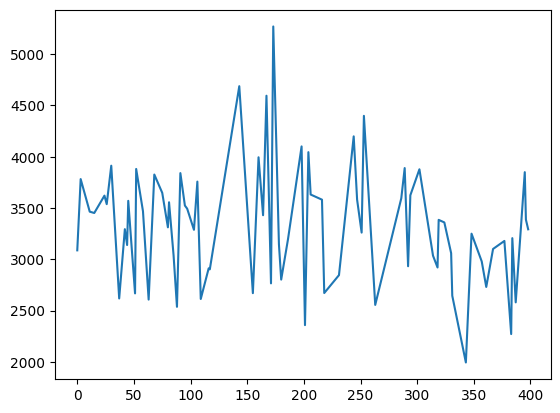

In [21]:
df_off[df_off["position_group"]=="Center Forward"]["total_distance_full_tip"].plot() # on voit que la distance parcourue varie selon le joueur

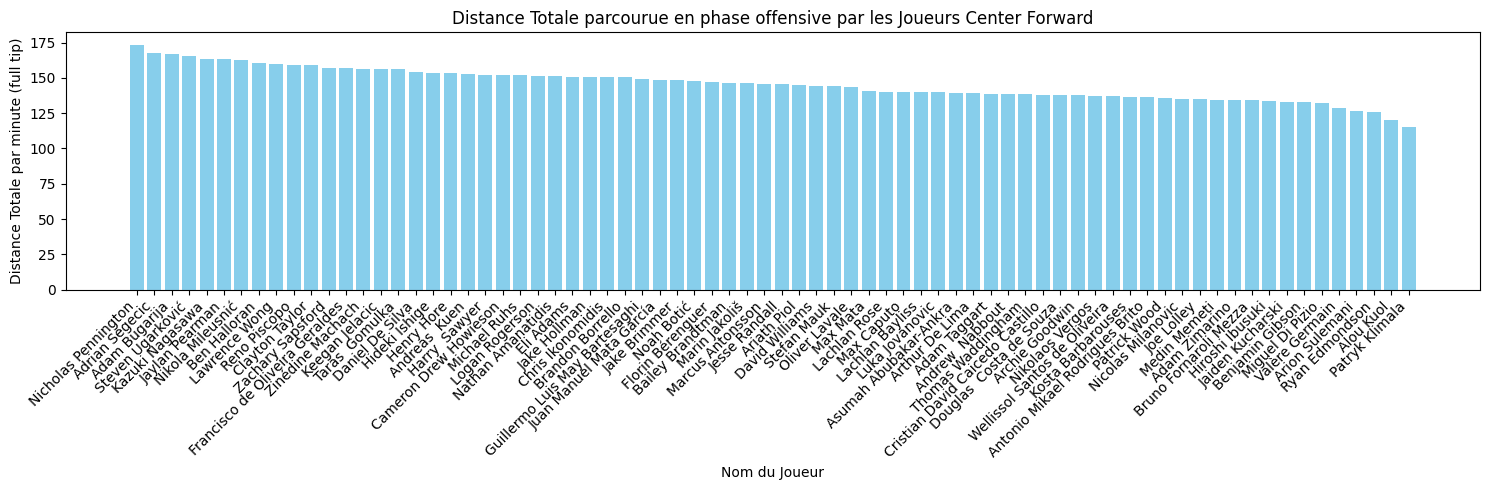

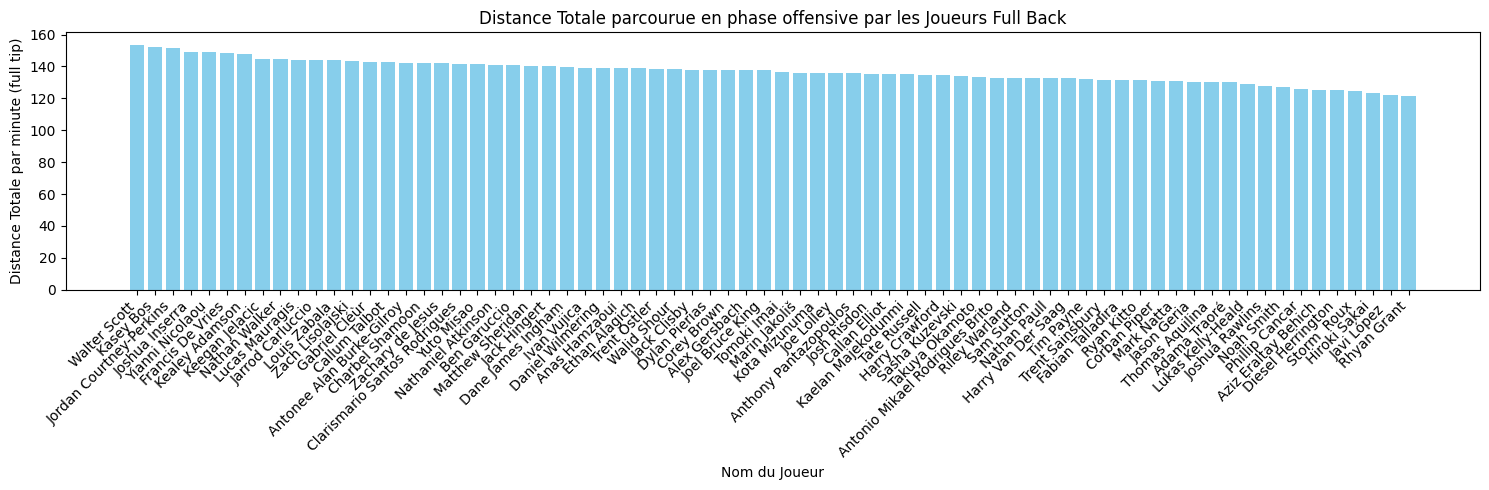

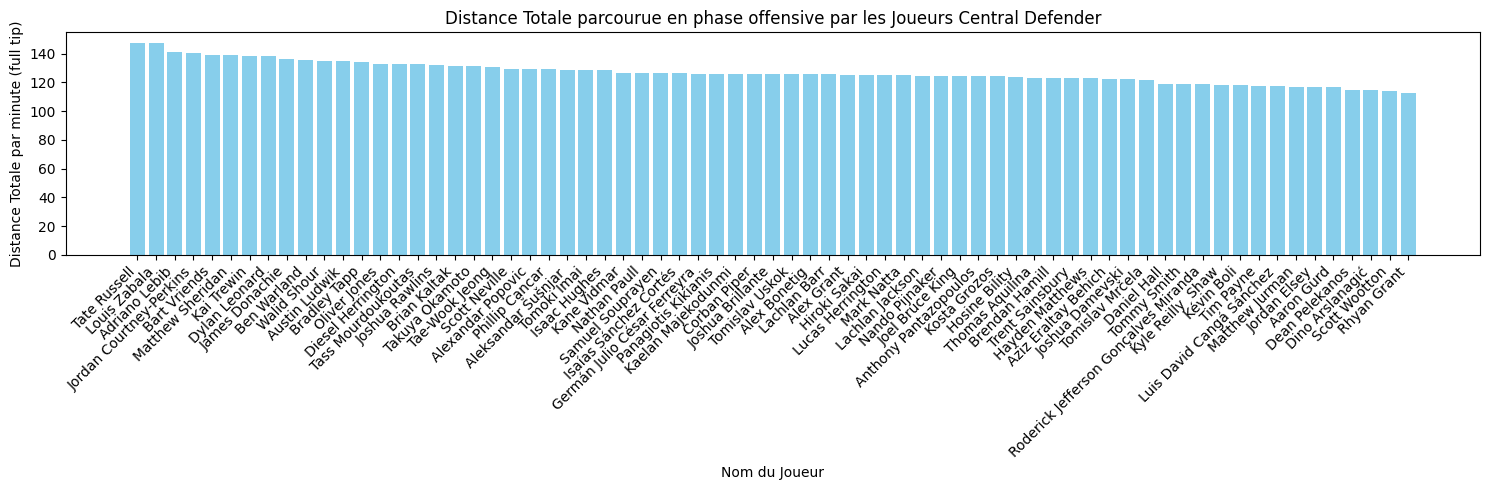

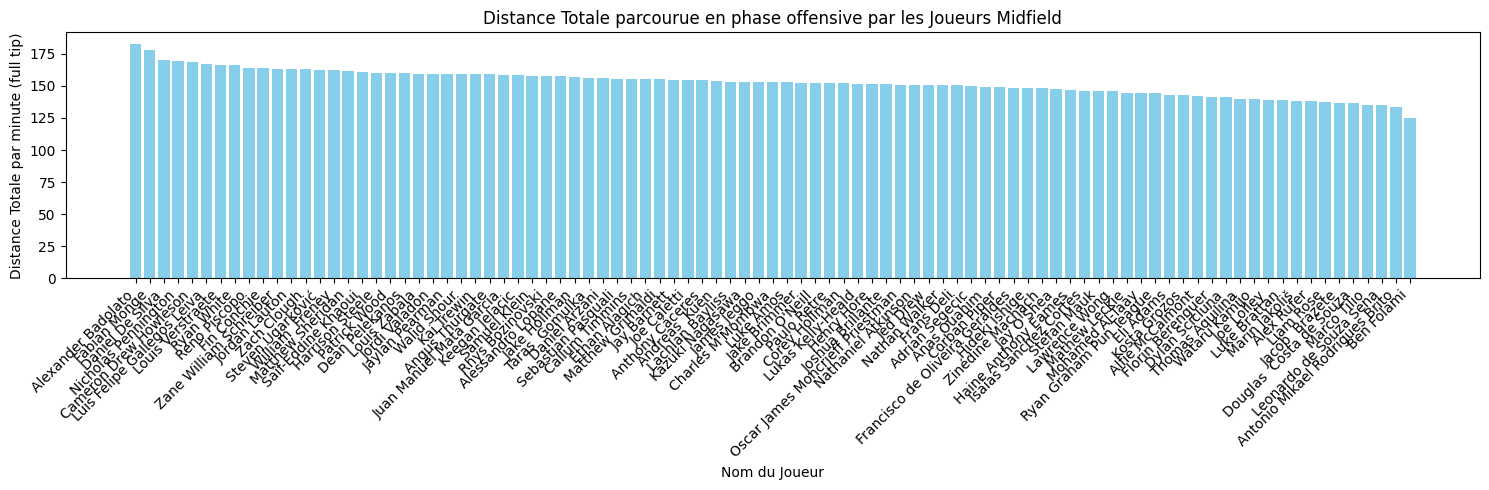

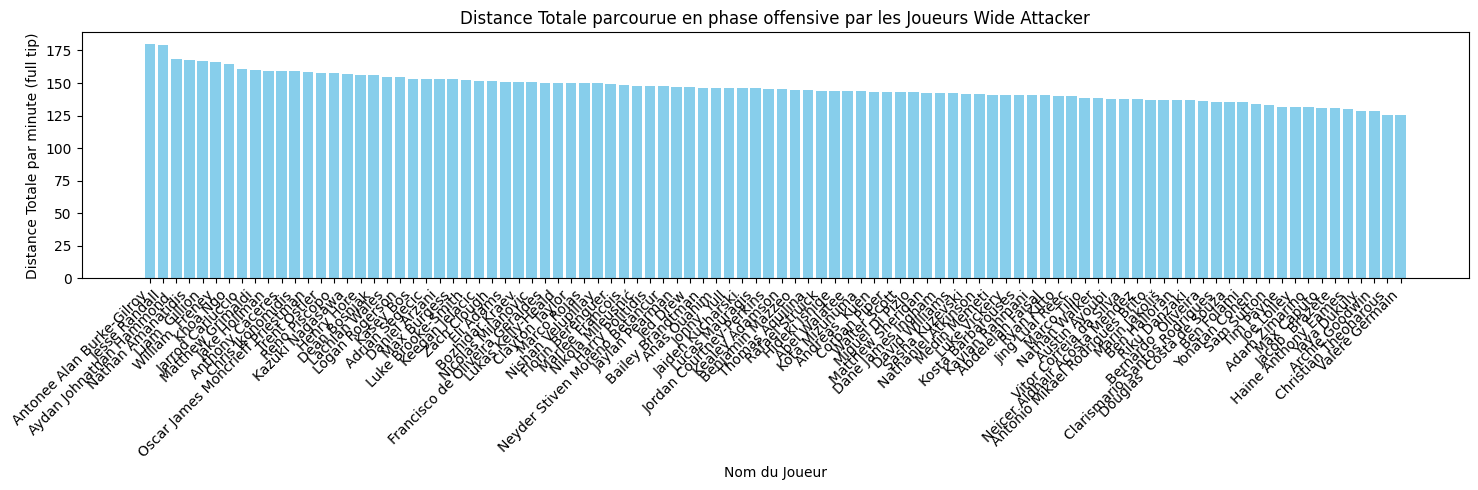

In [22]:
for position in df_off["position_group"].unique().tolist():

    df_cf = df_off[df_off["position_group"] == position].copy()

    # On trie par 'total_distance_full_tip' par ordre décroissant
    df_cf = df_cf.sort_values(by="total_metersperminute_full_tip", ascending=False)

    plt.figure(figsize=(15, 5)) # Ajuster la taille pour que les noms des joueurs soient lisibles
    plt.bar(df_cf["player_name"], df_cf["total_metersperminute_full_tip"], color='skyblue')

    plt.xlabel("Nom du Joueur")
    plt.ylabel("Distance Totale par minute (full tip)")
    plt.title(f"Distance Totale parcourue en phase offensive par les Joueurs {position}")

    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()

    plt.show()

In [23]:
stats_cols = df_def.drop(columns = ["player_name", "position_group"]).columns.tolist()

In [24]:
for col in df_def.drop(columns = ["player_name", "position_group"]).columns.tolist():
    df_def[col + "_norm"] = (df_def[col] - df_def[col].min()) / (df_def[col].max() - df_def[col].min())


/var/folders/dr/m9v4shms079d9s6z6c8cg57m0000gn/T/ipykernel_44637/3079139010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_def[col + "_norm"] = (df_def[col] - df_def[col].min()) / (df_def[col].max() - df_def[col].min())
/var/folders/dr/m9v4shms079d9s6z6c8cg57m0000gn/T/ipykernel_44637/3079139010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_def[col + "_norm"] = (df_def[col] - df_def[col].min()) / (df_def[col].max() - df_def[col].min())
/var/folders/dr/m9v4shms079d9s6z6c8cg57m0000gn/T/ipykern

In [25]:
df_def

,player_name,position_group,total_distance_full_otip,total_metersperminute_full_otip,running_distance_full_otip,hsr_distance_full_otip,hsr_count_full_otip,sprint_distance_full_otip,sprint_count_full_otip,hi_distance_full_otip,...,total_distance_full_otip_norm,total_metersperminute_full_otip_norm,running_distance_full_otip_norm,hsr_distance_full_otip_norm,hsr_count_full_otip_norm,sprint_distance_full_otip_norm,sprint_count_full_otip_norm,hi_distance_full_otip_norm,hi_count_full_otip_norm,medaccel_count_full_otip_norm
0,Adam Taggart,Center Forward,4423.04,138.05,755.33,249.38,24.21,48.46,3.00,297.83,...,0.566727,0.197298,0.359977,0.330878,0.38025,0.230949,0.272727,0.347331,0.374130,0.517255
1,Adama Traoré,Full Back,2789.33,139.51,480.17,245.67,21.00,69.67,4.00,315.33,...,0.207591,0.215392,0.152466,0.323798,0.30000,0.334161,0.363636,0.376161,0.326087,0.428039
2,Dino Arslanagić,Central Defender,3517.12,130.95,559.00,194.12,15.62,29.12,1.25,223.25,...,0.367580,0.109307,0.211916,0.225420,0.16550,0.136837,0.113636,0.224465,0.149565,0.570980
3,Douglas Costa de Souza,Center Forward,3652.50,147.23,662.00,199.25,15.50,28.00,2.00,227.25,...,0.397340,0.311067,0.289593,0.235210,0.16250,0.131387,0.181818,0.231054,0.163043,0.250000
4,Douglas Costa de Souza,Midfield,2840.00,159.70,637.00,169.00,16.00,1.00,0.00,170.00,...,0.218729,0.465609,0.270739,0.177481,0.17500,0.000000,0.000000,0.136738,0.130435,0.196078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,Fabian Talladira,Full Back,4125.00,142.49,793.00,278.00,27.00,68.00,3.00,346.00,...,0.501209,0.252324,0.388386,0.385496,0.45000,0.326034,0.272727,0.426689,0.434783,0.705882
402,Kyle Reilly Shaw,Central Defender,3527.50,160.95,732.00,345.50,28.00,65.00,4.50,410.50,...,0.369862,0.481101,0.342383,0.514313,0.47500,0.311436,0.409091,0.532949,0.489130,0.450980
403,Austin Ludwik,Central Defender,3397.00,134.53,468.33,185.00,17.00,43.00,2.67,228.00,...,0.341174,0.153675,0.143537,0.208015,0.20000,0.204380,0.242727,0.232290,0.210217,0.444510
404,Harry Crawford,Full Back,3561.50,154.57,667.00,314.50,27.50,135.00,7.00,449.50,...,0.377336,0.402032,0.293363,0.455153,0.46250,0.652068,0.636364,0.597199,0.532609,0.500000


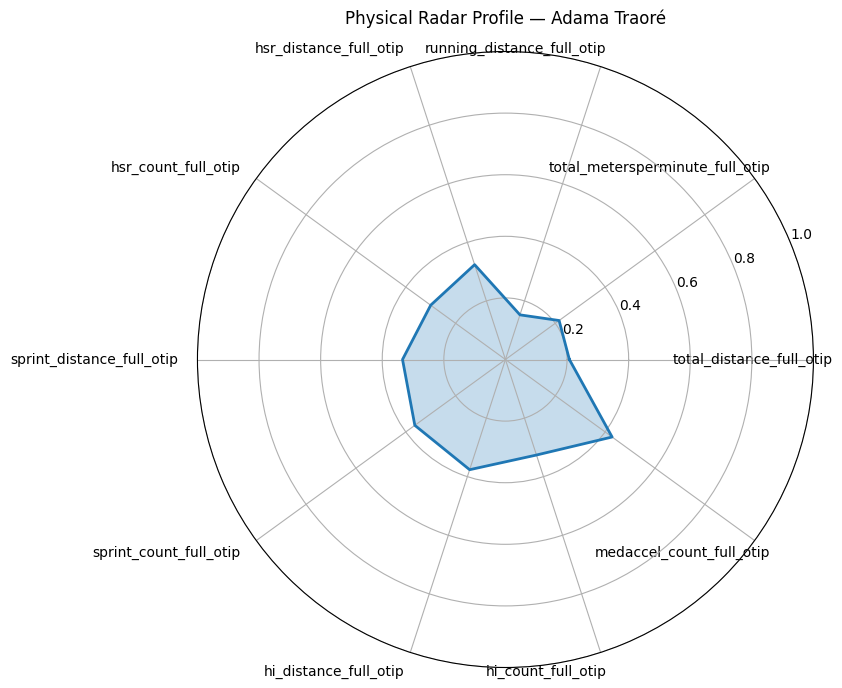

In [29]:
player = "Adama Traoré"
df_def_player = df_def[df_def["player_name"] == player]

# Préparer le radar
values = [df_def_player[col+ "_norm"] for col in stats_cols]
values += values[:1]

categories = stats_cols
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

# --- Plot radar ---
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))

ax.plot(angles, values, linewidth=2)
ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(stats_cols, rotation=45, ha="right")
ax.set_ylim(0, 1)

ax.set_title(f"Physical Radar Profile — {player}", pad=20)
plt.show()

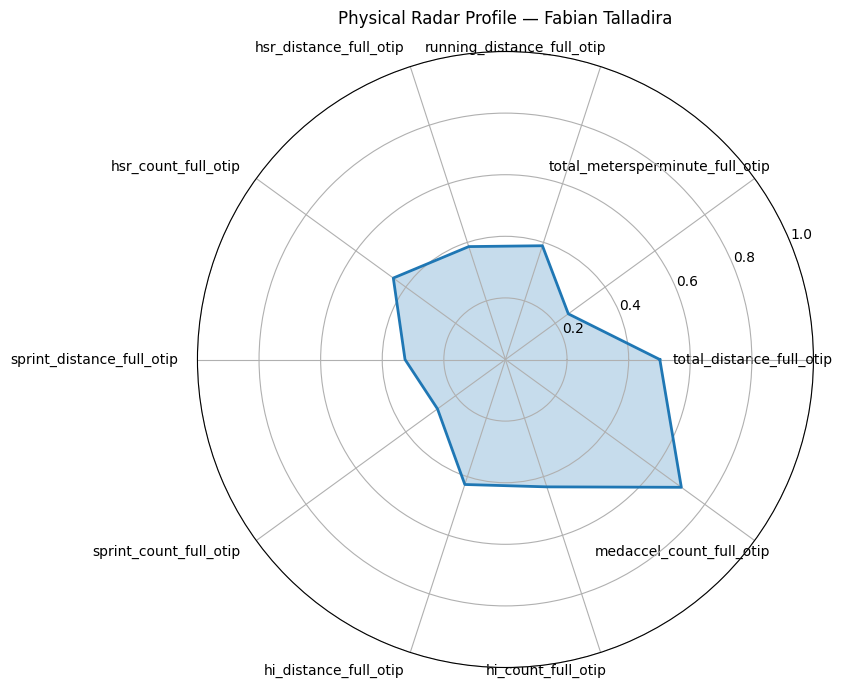

In [34]:
player = "Fabian Talladira"
df_def_player = df_def[df_def["player_name"] == player]

# Préparer le radar
values = [df_def_player[col+ "_norm"] for col in stats_cols]
values += values[:1]

categories = stats_cols
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

# --- Plot radar ---
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))

ax.plot(angles, values, linewidth=2)
ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(stats_cols, rotation=45, ha="right")
ax.set_ylim(0, 1)

ax.set_title(f"Physical Radar Profile — {player}", pad=20)
plt.show()

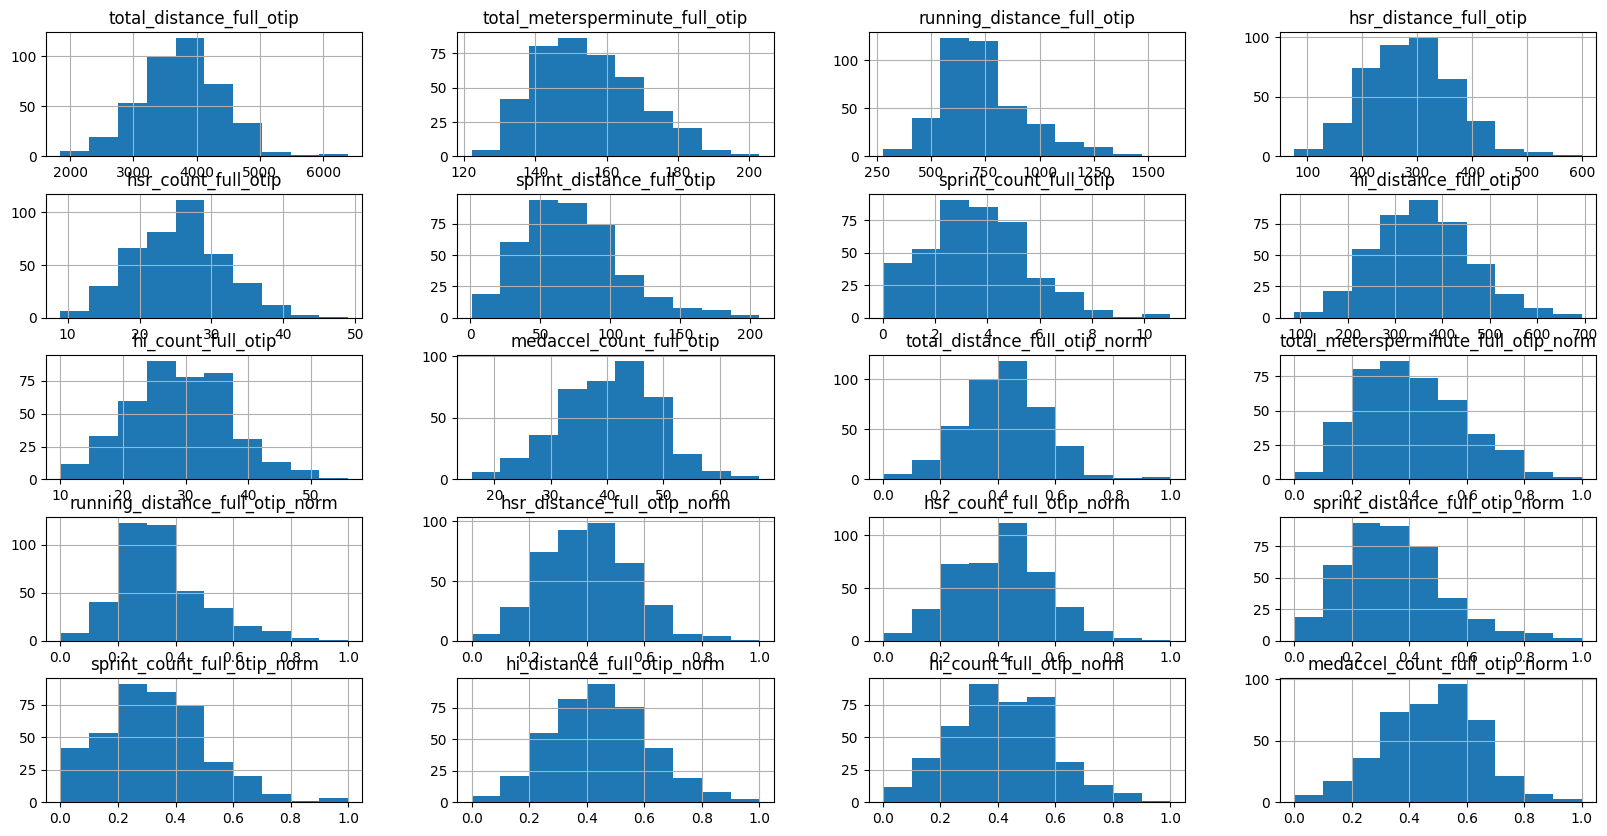

In [38]:
df_def.hist(figsize=(20,10));

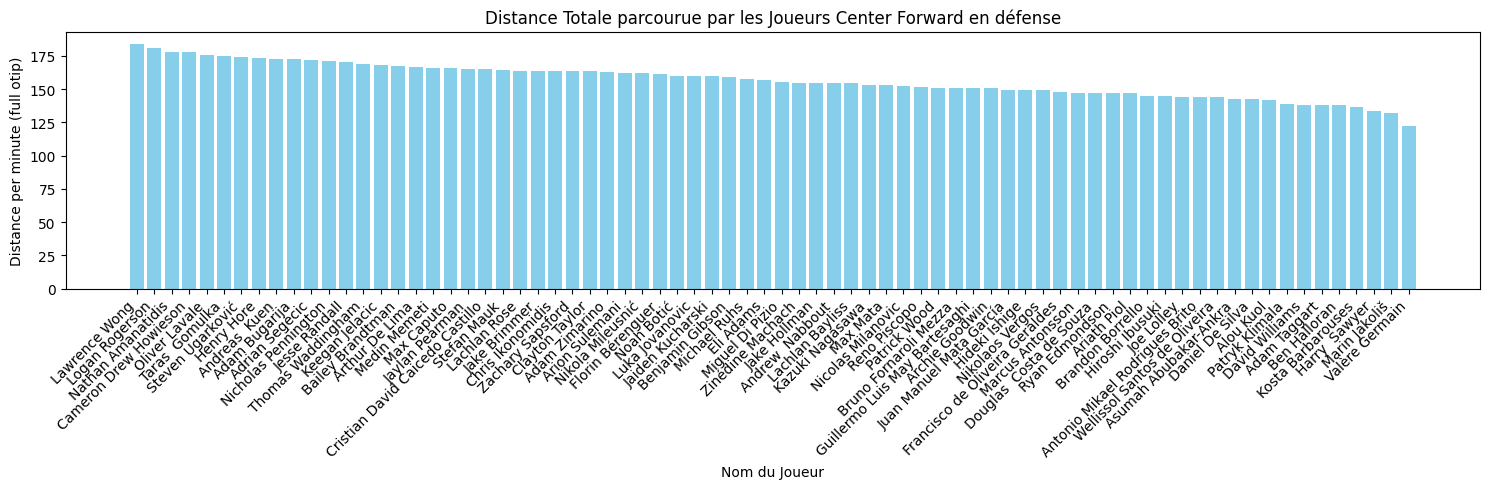

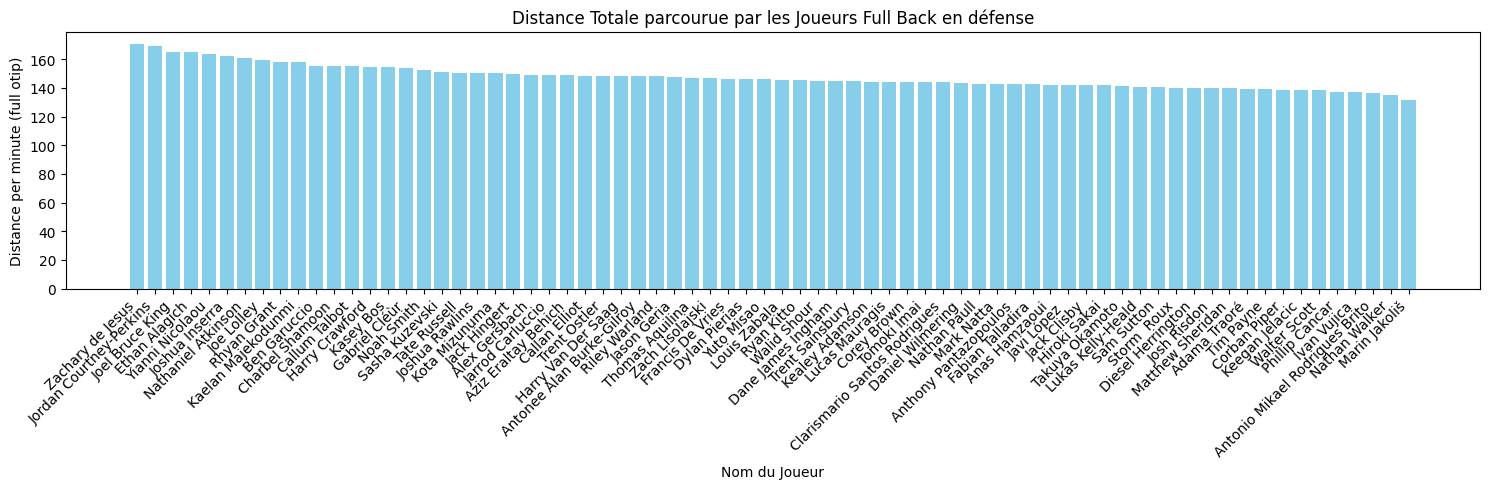

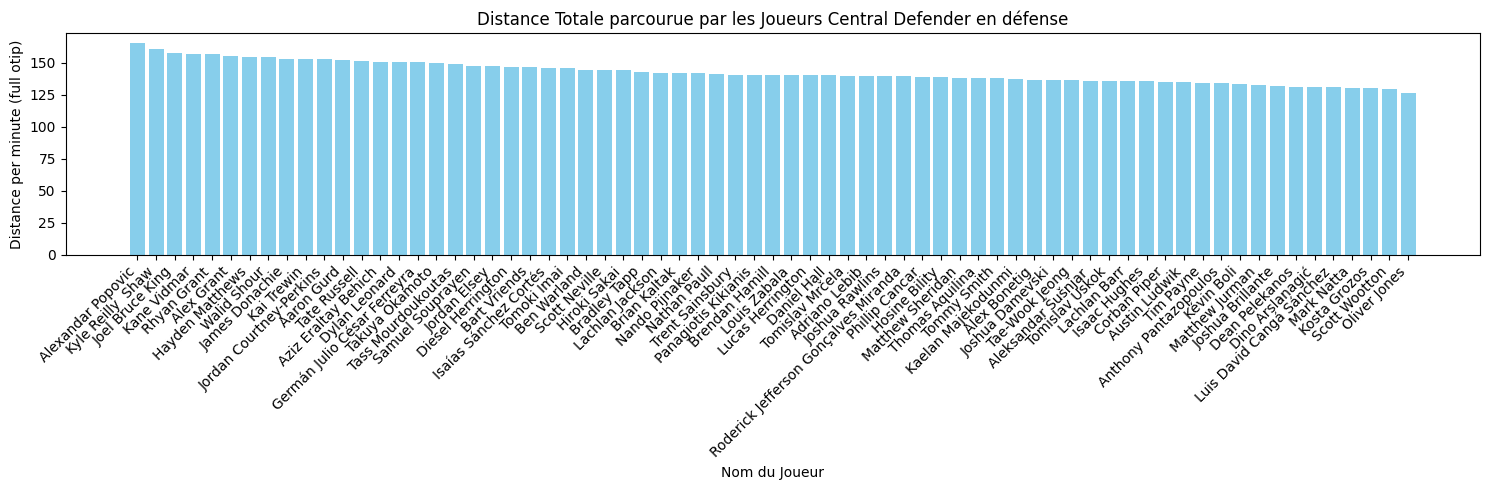

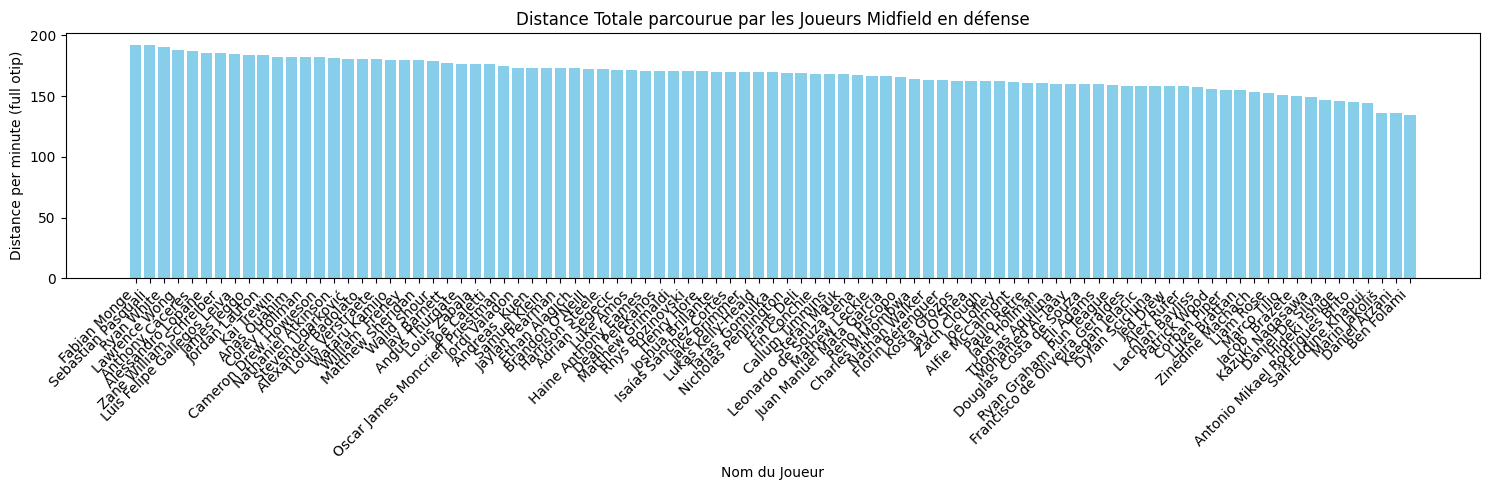

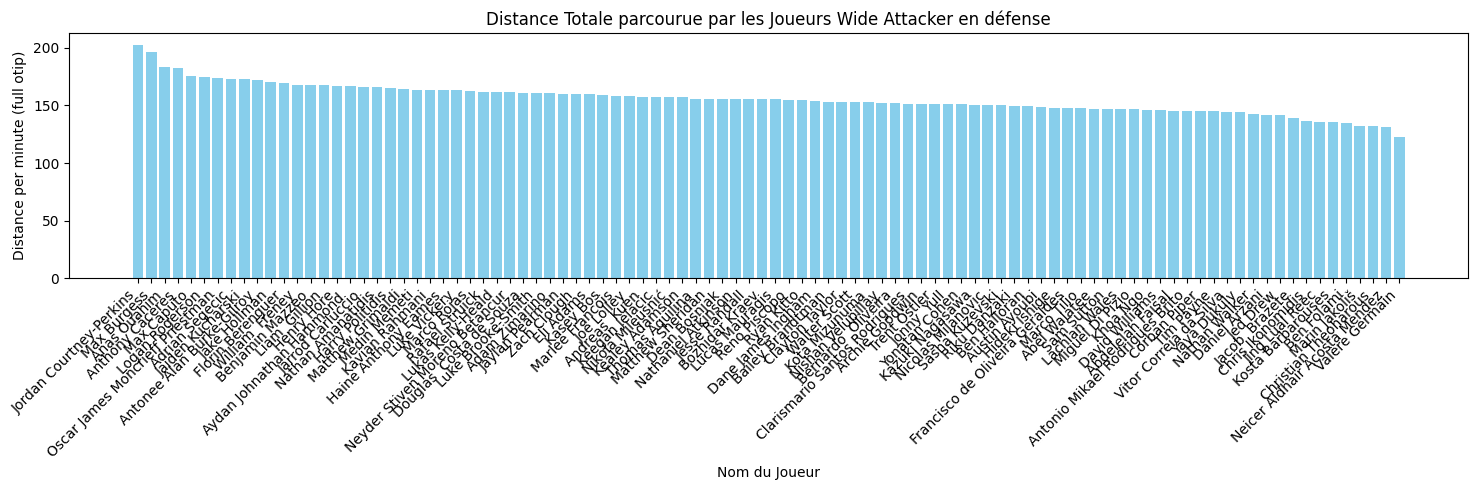

In [27]:
for position in df_def["position_group"].unique().tolist():

    df_cf = df_def[df_def["position_group"] == position].copy()

    # On trie par 'total_distance_full_otip' par ordre décroissant
    df_cf = df_cf.sort_values(by="total_metersperminute_full_otip", ascending=False)

    plt.figure(figsize=(15, 5)) # Ajuster la taille pour que les noms des joueurs soient lisibles
    plt.bar(df_cf["player_name"], df_cf["total_metersperminute_full_otip"], color='skyblue')

    plt.xlabel("Nom du Joueur")
    plt.ylabel("Distance per minute (full otip)")
    plt.title(f"Distance Totale parcourue en phase défensive par les Joueurs {position}")

    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()

    plt.show()

In [28]:
df_long = (
    df
    .melt(
        id_vars=["player_name", "position_group"],
        var_name="feature",
        value_name="value"
    )
    .assign(category=lambda d: d["feature"].map(stat_categories))
)


In [29]:
df_long.groupby(["position_group", "category"])["value"].mean()
# It seems possible to distinguish among the different groups of players

position_group    category         
Center Forward    athletic_profile      122.343973
                  defensive             529.944095
                  general                27.262378
                  midfield_activity    3775.950766
                  offensive             326.898423
Central Defender  athletic_profile       89.171576
                  defensive             535.841797
                  general                31.879014
                  midfield_activity    3808.684928
                  offensive             279.688464
Full Back         athletic_profile      131.361048
                  defensive             560.198554
                  general                30.294216
                  midfield_activity    3935.348964
                  offensive             324.898423
Midfield          athletic_profile      112.147346
                  defensive             588.939467
                  general                28.385391
                  midfield_activity      4120.

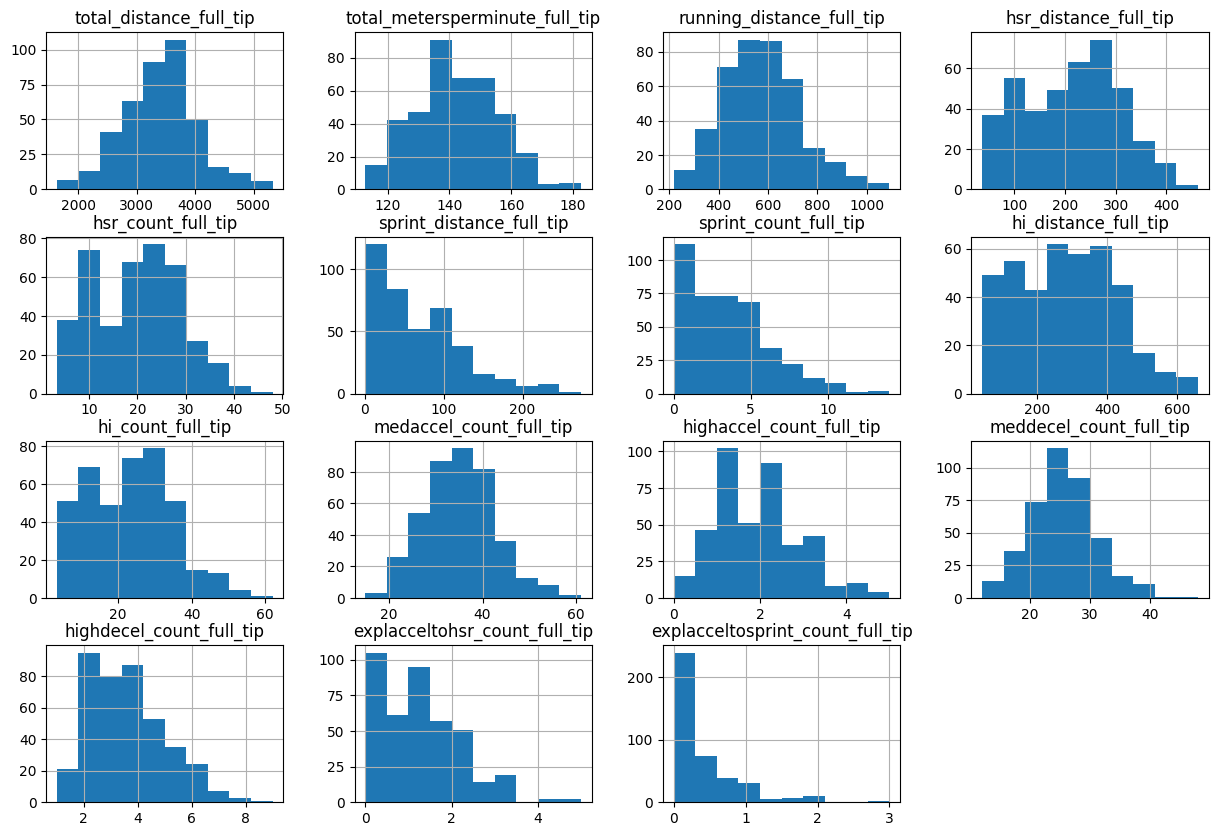

In [30]:
df_off.hist(figsize = (15,10));

<Axes: xlabel='position_group'>

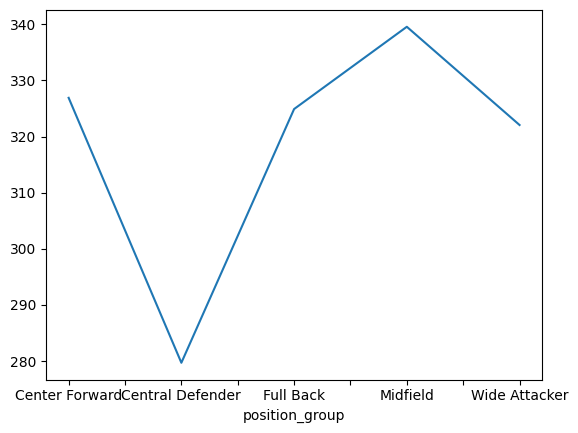

In [31]:
df_long[df_long["category"]=="offensive"].groupby(["position_group"])["value"].mean().plot()

In [32]:
df_long["category"].unique().tolist()

[nan,
 'general',
 'midfield_activity',
 'athletic_profile',
 'offensive',
 'defensive']

In [40]:
player = "Adama Traoré"  # <-- changer le nom ici

df_player = df_long[df_long["player_name"] == player]
df_player_off = df_player[df_player["category"] == "offensive"]


In [42]:
df_player_off.head()

,player_name,position_group,feature,value,category,value_norm
13399,Adama Traoré,Full Back,total_distance_full_tip,3411.67,offensive,1.0
13805,Adama Traoré,Full Back,total_metersperminute_full_tip,130.05,offensive,0.038071
14211,Adama Traoré,Full Back,running_distance_full_tip,478.17,offensive,0.140114
14617,Adama Traoré,Full Back,hsr_distance_full_tip,157.0,offensive,0.045971
15023,Adama Traoré,Full Back,hsr_count_full_tip,16.17,offensive,0.00469


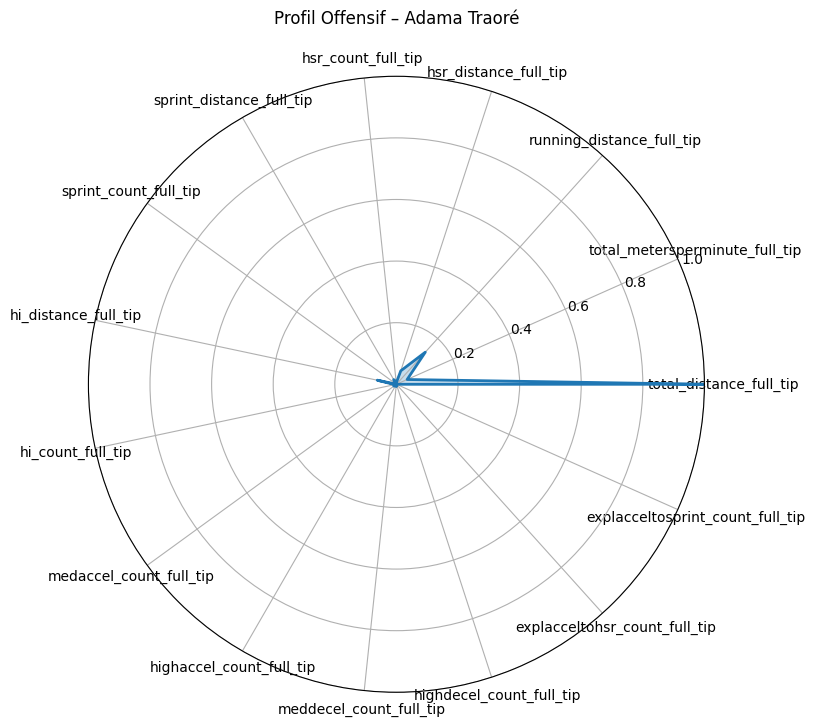

In [43]:
import numpy as np
df_player_off = df_player_off.copy()
df_player_off["value_norm"] = (df_player_off["value"] - df_player_off["value"].min()) / \
                              (df_player_off["value"].max() - df_player_off["value"].min())

# Préparation radar
categories = df_player_off["feature"].tolist()
values = df_player_off["value_norm"].tolist()

values += values[:1]
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

# Plot radar
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))
ax.plot(angles, values, linewidth=2)
ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_ylim(0, 1)
ax.set_title(f"Profil Offensif – {player}", pad=20)

plt.show()

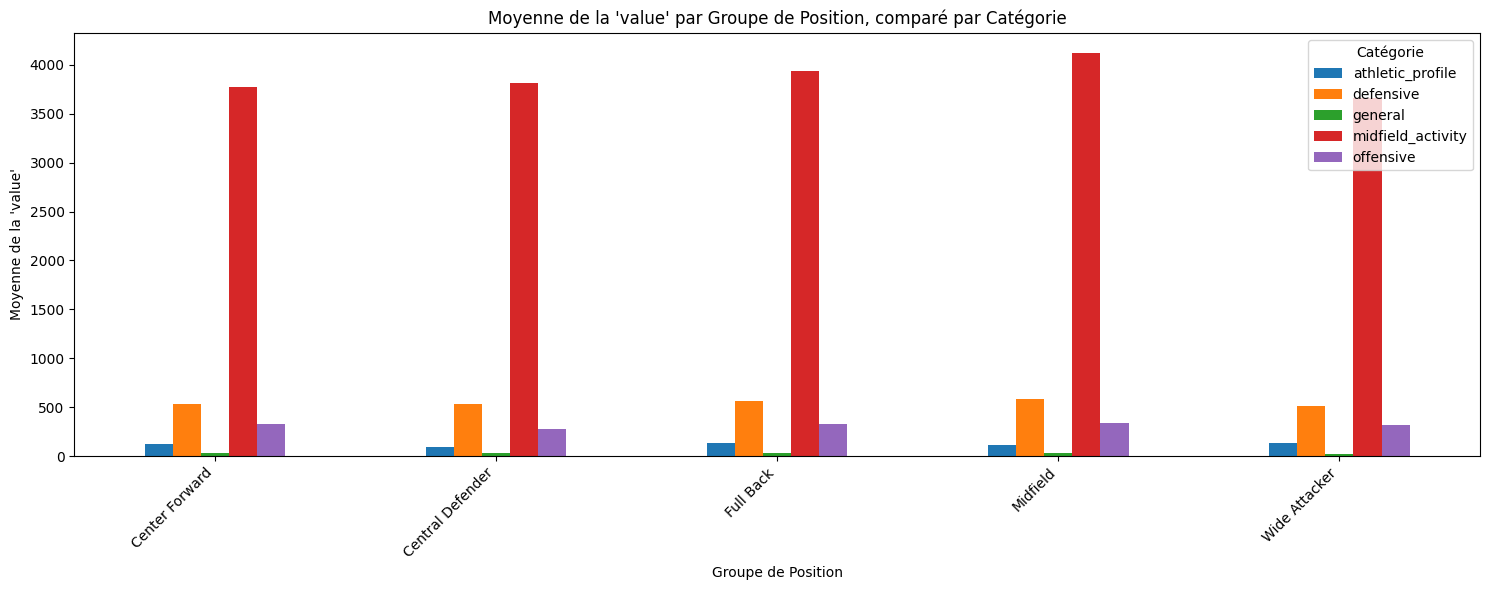

In [35]:
df_plot = df_long.groupby(["position_group", "category"])["value"].mean()

df_plot = df_plot.unstack(level='category')


fig, ax = plt.subplots(figsize=(15, 6))

df_plot.plot(kind='bar', ax=ax)

ax.set_title("Moyenne de la 'value' par Groupe de Position, comparé par Catégorie")
ax.set_xlabel("Groupe de Position")
ax.set_ylabel("Moyenne de la 'value'")
ax.legend(title="Catégorie")

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

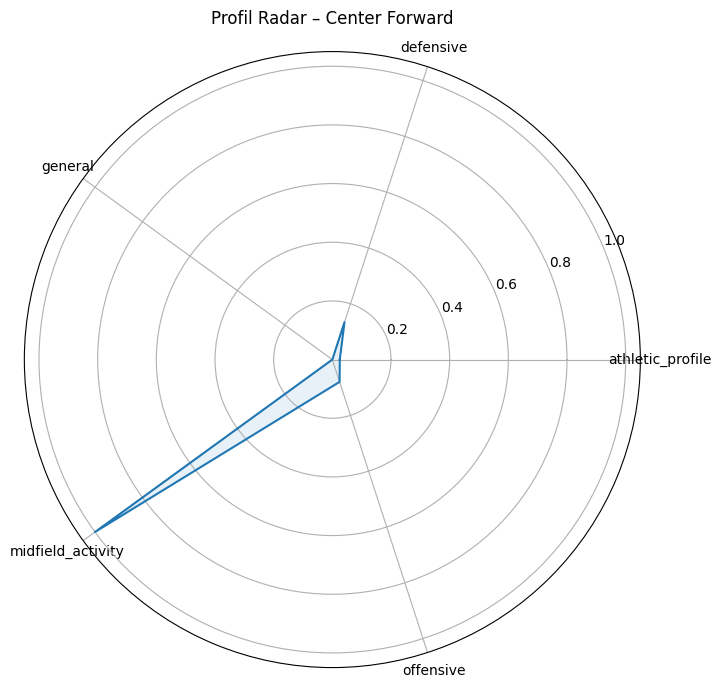

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Sélectionner un groupe de position spécifique (exemple: "Center Forward")
pos = "Center Forward"
df_radar = df_plot.loc[pos]


# Normalisation min-max pour le groupe choisi --> à faire avant
df_radar = (df_radar - df_radar.min()) / (df_radar.max() - df_radar.min())

categories = df_radar.index.tolist()
values = df_radar.values.tolist()

values += values[:1]
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))

ax.plot(angles, values)
ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

ax.set_title(f"Profil Radar – {pos}", pad=20)
plt.show()


In [37]:
import plotly.graph_objects as go

categories = df_plot.columns.tolist()
positions = df_plot.index.tolist()

fig = go.Figure()

for pos in positions:
    values = df_plot.loc[pos].tolist()
    values += values[:1]  # fermer le radar

    fig.add_trace(go.Scatterpolar(
        r = values,
        theta = categories + [categories[0]],
        mode = 'lines+markers',
        name = pos
    ))

# Layout du radar
fig.update_layout(
    polar = dict(
        radialaxis = dict(visible=True)
    ),
    title = "Comparaison radar des position groups",
    showlegend = True
)

fig.show()
